In [2]:
import matplotlib.pyplot as plt
import random
import math
import statistics as st

In [3]:
%matplotlib inline

In [7]:
def flip(n):
    flip = random.randint(0, 1) 
    return flip
 

In [16]:
def get_results(n=2**16):
    res = []
    heads = 0
    tails = 1
    count = 0
    for x in range(n):
        if flip(1) == True:
            heads += 1
            count += 1
        else:
            tails += 1
            count += 1
        if math.log2(x+1) % 1 == 0:
            res.append((heads, tails))
    if sum(res[len(res)-1]) != count:
        res.append((heads, tails))
    return res
    
    
    
results = get_results()



In [17]:
print(results)


[(1, 1), (2, 1), (3, 2), (6, 3), (12, 5), (20, 13), (38, 27), (75, 54), (145, 112), (275, 238), (543, 482), (1041, 1008), (2051, 2046), (4117, 4076), (8210, 8175), (16296, 16473), (32685, 32852), (32685, 32852)]


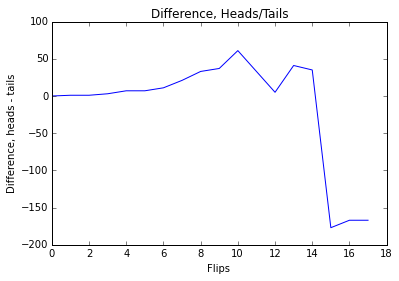

In [18]:
plt.plot([x-y for x, y in results])
plt.xlabel("Flips")
plt.ylabel("Difference, heads - tails")
plt.title("Difference, Heads/Tails")
plt.show()


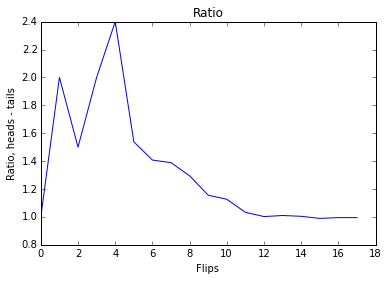

In [19]:
plt.plot([x/y for x,y in results])
plt.xlabel("Flips")
plt.ylabel("Ratio, heads - tails")
plt.title("Ratio")
plt.show()
    

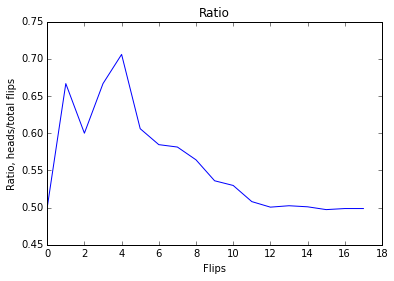

In [21]:
plt.plot([x/(x+y) for x,y in results])
plt.xlabel("Flips")
plt.ylabel("Ratio, heads/total flips")
plt.title("Ratio")
plt.show()

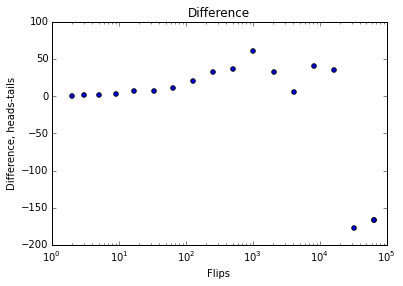

In [23]:
plt.scatter([x+y for x, y in results], [x-y for x, y in results])
plt.xlabel("Flips")
plt.ylabel("Difference, heads-tails")
plt.title("Difference")
plt.xscale('log')
plt.show()

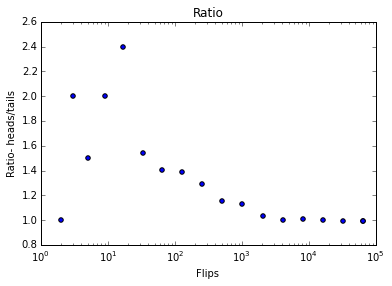

In [24]:
plt.scatter([x+y for x,y in results], [x/y for x,y in results])
plt.xlabel("Flips")
plt.ylabel("Ratio- heads/tails")
plt.title("Ratio")
plt.xscale('log')
plt.show()

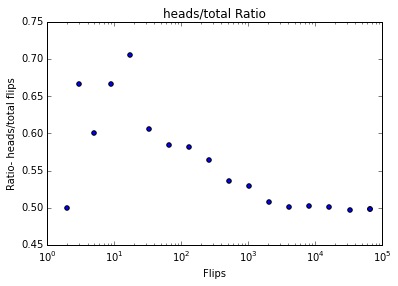

In [25]:
plt.scatter([x+y for x,y in results], [x/(x+y) for x,y in results])
plt.xlabel("Flips")
plt.ylabel("Ratio- heads/total flips")
plt.title("heads/total Ratio")
plt.xscale('log')
plt.show()

The above graphs show that the more flips that are done, the difference in heads and tails increases gradually.  At the same time the ratio gradually gets closer to 1, while the ratio of heads to total flips gets closer to .5

In [28]:
def sim_trial():
    return [get_results() for x in range(20)]

In [29]:
sim_trial = sim_trial()
print(sim_trial)

[[(1, 1), (2, 1), (3, 2), (5, 4), (8, 9), (16, 17), (28, 37), (60, 69), (123, 134), (260, 253), (507, 518), (998, 1051), (2025, 2072), (4070, 4123), (8131, 8254), (16387, 16382), (32815, 32722), (32815, 32722)], [(1, 1), (2, 1), (3, 2), (4, 5), (6, 11), (20, 13), (38, 27), (74, 55), (136, 121), (263, 250), (505, 520), (1022, 1027), (2033, 2064), (4054, 4139), (8167, 8218), (16334, 16435), (32619, 32918), (32619, 32918)], [(0, 2), (0, 3), (1, 4), (3, 6), (7, 10), (16, 17), (35, 30), (75, 54), (141, 116), (254, 259), (509, 516), (1025, 1024), (2050, 2047), (4076, 4117), (8137, 8248), (16372, 16397), (32792, 32745), (32792, 32745)], [(0, 2), (0, 3), (1, 4), (4, 5), (9, 8), (17, 16), (34, 31), (66, 63), (125, 132), (241, 272), (485, 540), (1004, 1045), (2062, 2035), (4107, 4086), (8226, 8159), (16396, 16373), (32733, 32804), (32733, 32804)], [(0, 2), (1, 2), (1, 4), (3, 6), (6, 11), (14, 19), (28, 37), (60, 69), (111, 146), (235, 278), (505, 520), (999, 1050), (2022, 2075), (4118, 4075), (

In [30]:
def ratio(r):
    return [x/(y+x) for x,y in r]

coll = [ratio(n) for n in sim_trial]

print(coll)

[[0.5, 0.6666666666666666, 0.6, 0.5555555555555556, 0.47058823529411764, 0.48484848484848486, 0.4307692307692308, 0.46511627906976744, 0.4785992217898833, 0.50682261208577, 0.4946341463414634, 0.4870668618838458, 0.4942640956797657, 0.4967655315513243, 0.4962465669819957, 0.5000762916170771, 0.5007095228649465, 0.5007095228649465], [0.5, 0.6666666666666666, 0.6, 0.4444444444444444, 0.35294117647058826, 0.6060606060606061, 0.5846153846153846, 0.5736434108527132, 0.5291828793774319, 0.5126705653021443, 0.4926829268292683, 0.4987798926305515, 0.4962167439589944, 0.4948126449408031, 0.4984436985047299, 0.4984589093350423, 0.49771884584280635, 0.49771884584280635], [0.0, 0.0, 0.2, 0.3333333333333333, 0.4117647058823529, 0.48484848484848486, 0.5384615384615384, 0.5813953488372093, 0.5486381322957199, 0.4951267056530214, 0.49658536585365853, 0.5002440214738897, 0.5003661215523554, 0.49749786403026974, 0.4966127555691181, 0.4996185419146144, 0.5003585760715321, 0.5003585760715321], [0.0, 0.0, 

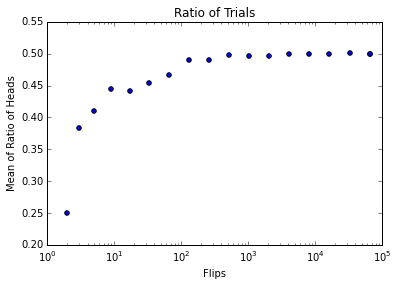

In [32]:
plt.scatter([x+y for x,y in results], [st.mean(x) for x in list(zip(*coll))])
plt.xlabel('Flips')
plt.ylabel('Mean of Ratio of Heads')
plt.title("Ratio of Trials")
plt.xscale('log')
plt.show()

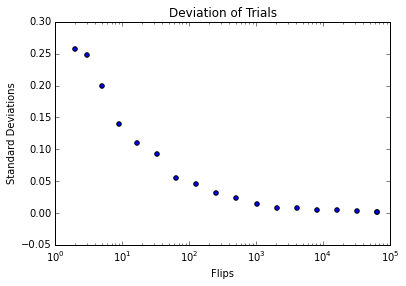

In [33]:
plt.scatter([x+y for x,y in results], [st.stdev(x) for x in list(zip(*coll))])
plt.xlabel('Flips')
plt.ylabel('Standard Deviations')
plt.title('Deviation of Trials')
plt.xscale('log')
plt.show()

In [35]:
def flip100():
    heads_tot = 1
    for _ in range(100):
        if flip(1) == True:
            heads_tot += 1
    return heads_tot/100

print(flip100())

0.44


In [37]:
def multi_trials100():
    return [flip100() for x in range(100000)]
mult_trials100 = multi_trials100()

ValueError: x has only one data point. bins or range kwarg must be given

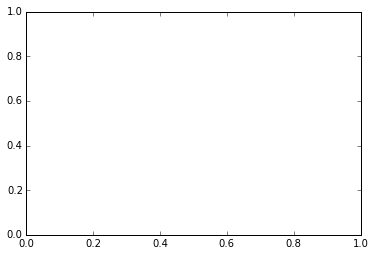

In [38]:
plt.hist(multi_trials100)
plt.show()

TypeError: unsupported operand type(s) for +: 'function' and 'function'

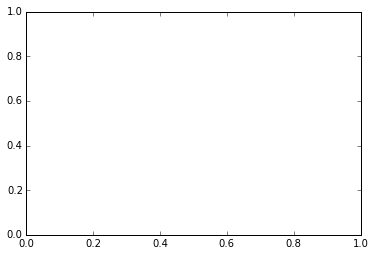

In [40]:
plt.boxplot([multi_trials100, multi_trials100])
plt.show()